# Capstone Project

A venit momentul să ne testăm cunoștințele procesare și  vizualizare a datelor. La finalul acestui proiect dorim să răspundem la întrebarea dacă există un conflict de interese în cadrul unui site care vinde bilete la cinema, dar și afișează review-uri la filmele pentru care vinde aceste bilete. Site-ul respectiv poartă denumirea de Fandango, iar acesta vinde bilete la filme și afișează și review-uri la aceste filme 

Să luăm scenariul în care cumpărăm un bilet de film de pe acel site pentru un film care are ca și raiting 4.5 stele dintr-un maxim de 5. După vizionarea filmului ne dăm seama că acest film nu este unul reușit și ne punem întrebarea dacă există un anumit conflict de interese pentru site-urile de genul acesta. Putem răspunde la întrebarea respectică prin intermediul Data Analysis? (ceea ce am încățat până în acest moment). Întrebarea mai specifică este că un site precum Fandango afișează un număr mai mare la rating precum alte site-uri sau precum anumiți critici de filme?

Pentru a răspunde la aceste întrebări o să utilizăm Pandas pentru a organiza datele și Seaborn pentru a le vizualiza.

Înainte de a începe acest proiect trebuie să știm că Fandango are două modalități de a afișa raiting-ul, una prin stele, iar alta prin numere. Ce importanță are acest aspect? În cazul steluțelor, incrementarea merge din 0.5 în 0.5. De exemplu, poate arată un raiting de 4.5 steluțe pentru un film care ca și valoare numerică are valoare de 4.3, însă deoarece se folosesc steluțe, acest număr a fosr rotunjit. Pentru început o să creem un grafic care o să ne arate dacă există o astfel de discrepanță între aceste valori. La final o să comparăm aceste valori cu recenzii de la alte site-uri. 

Prima parte a proiectului este să înțelegem ideea din spatele acestei probleme și să vedem cu ce fel de date trebuie să lucrăm. Pentru asta este recomandat să se citească următorul articol: https://fivethirtyeight.com/features/fandango-movies-ratings/

Următorul pas este de a citi fișierele csv în care sunt trecute datele cu care trebuie să lucrăm

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
all_sites_scores_df = pd.read_csv('../data/06-Capstone-Project/all_sites_scores.csv')

In [4]:
fandango_score_df = pd.read_csv('../data/06-Capstone-Project/fandango_scrape.csv')

In [5]:
all_sites_scores_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [6]:
fandango_score_df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [7]:
fandango_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [8]:
fandango_score_df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Pasul următor este de reprezenta vizual corelația dintre numărul de review-uri și raiting-ul unui film. Pentru asta o să creem un scatterplot

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

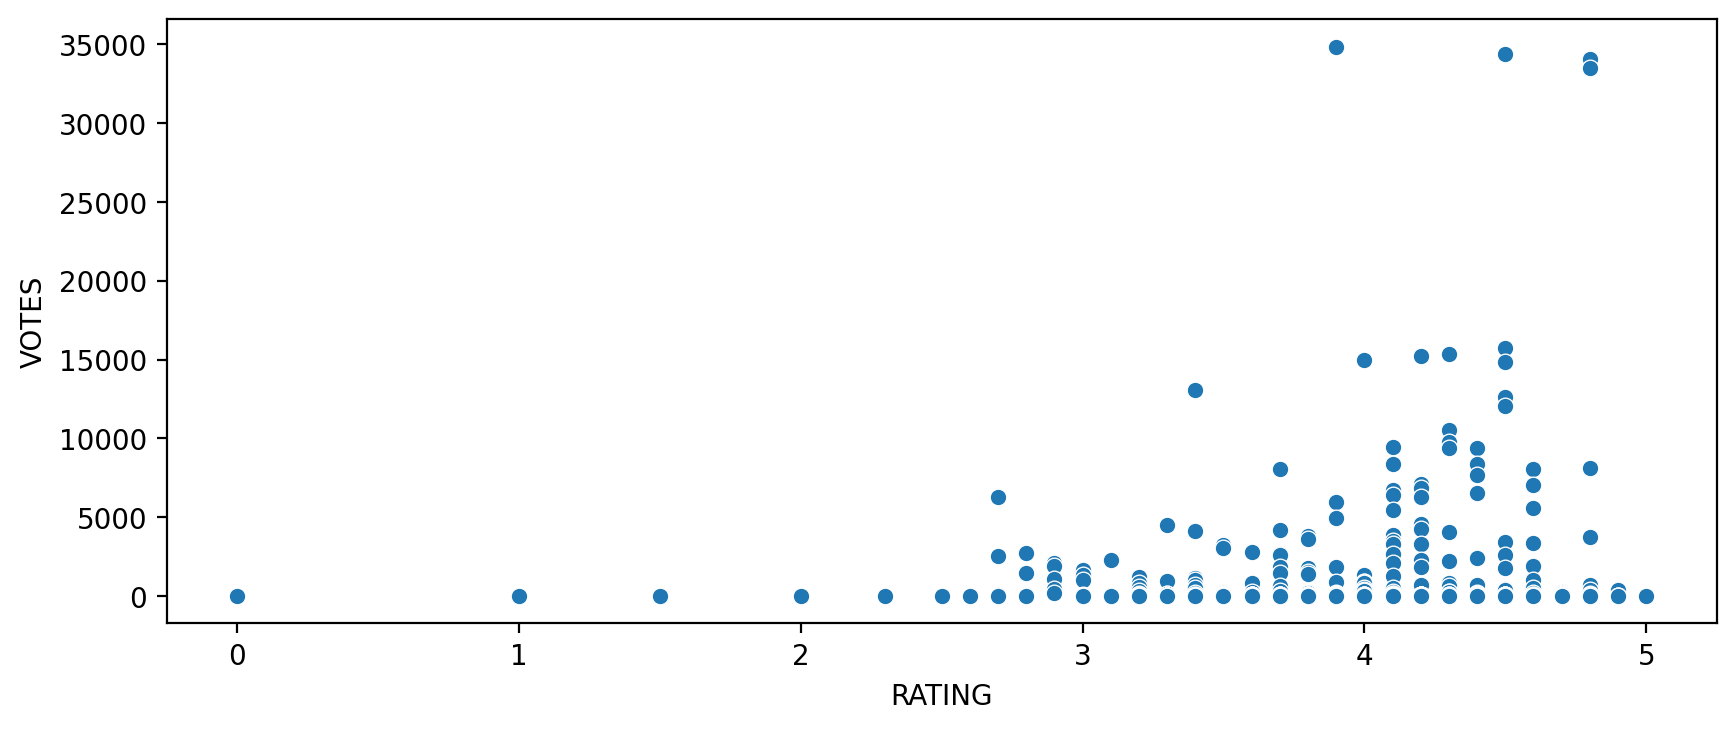

In [9]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(x='RATING', y='VOTES', data=fandango_score_df)

Următorul pas este să găsim corelația între coloanele numerice din acest data set

In [10]:
fandango_score_df.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Observând că fiecare film are următoare structură: Nume + (An) să extregem anul apariției filmului într-o coloană separată

In [11]:
def extract_year(movie):
    movie_splitted = movie.split()
    return int(movie_splitted[-1].lstrip('(').rstrip(')'))

In [12]:
fandango_score_df['YEAR'] = fandango_score_df['FILM'].apply(extract_year)

In [13]:
fandango_score_df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


Câte filme au apărut în anii care sunt prezenți în cadrul noului DataFrame?

In [14]:
fandango_score_df['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

Să vizualizăm valorile de mai sus în cadrul unui plot

<AxesSubplot:xlabel='YEAR', ylabel='count'>

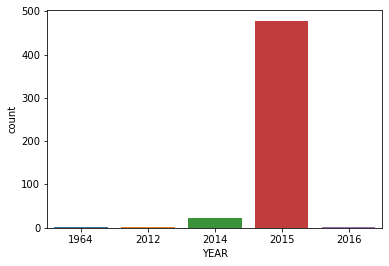

In [15]:
sns.countplot(x='YEAR', data=fandango_score_df)

Care sunt top 10 filme cu cele mai multe voturi?

In [16]:
fandango_score_df.sort_values('VOTES', ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Câte dintre filmele din DataFrame nu au niciun vot? 

In [17]:
len(fandango_score_df[(fandango_score_df['VOTES'] == 0)])

69

Eliminați aceste filme care nu au niciun review din DataFrame

In [18]:
fandango_score_df = fandango_score_df[~(fandango_score_df['VOTES'] == 0)]

In [19]:
fandango_score_df.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


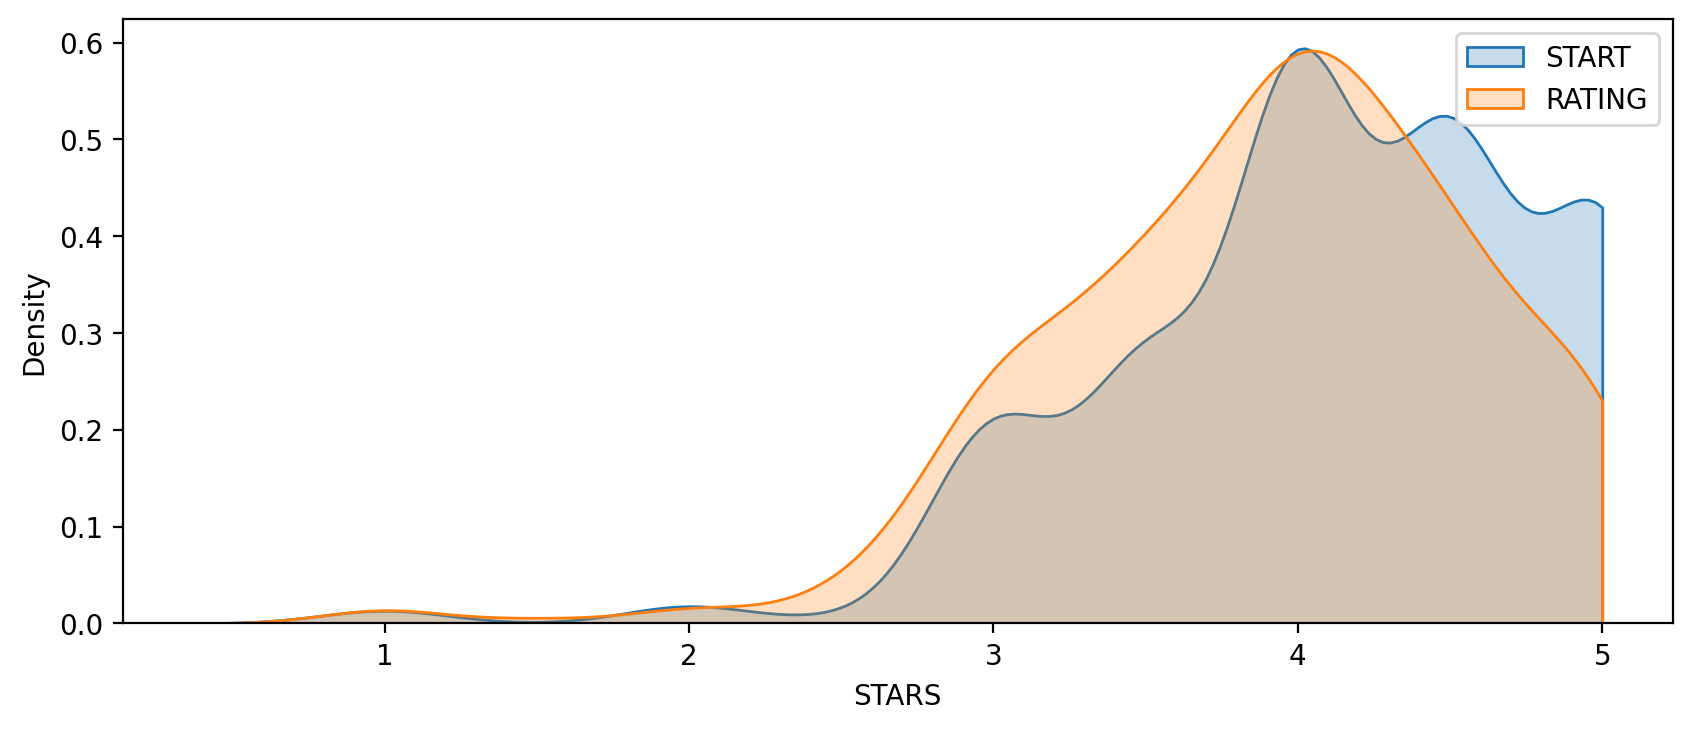

In [20]:
fig, axes= plt.subplots(figsize=(10, 4), dpi=200)

sns.kdeplot(x="STARS", data=fandango_score_df, ax=axes, label='START', fill=True, clip=[0, 5])
sns.kdeplot(x="RATING", data=fandango_score_df, ax=axes, label='RATING', fill=True, clip=[0, 5])
#axes.set_ylim(5)
axes.legend()

Să calculăm diferența dintre START și RATING

In [21]:
fandango_score_df['START_DIFF'] = np.round((fandango_score_df['STARS'] - fandango_score_df['RATING']), 1)

/var/folders/25/wbp849wd23g71mfg09jwp7g88qjfs0/T/ipykernel_7359/2744460811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_score_df['START_DIFF'] = np.round((fandango_score_df['STARS'] - fandango_score_df['RATING']), 1)


In [22]:
fandango_score_df

,FILM,STARS,RATING,VOTES,YEAR,START_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='START_DIFF', ylabel='count'>

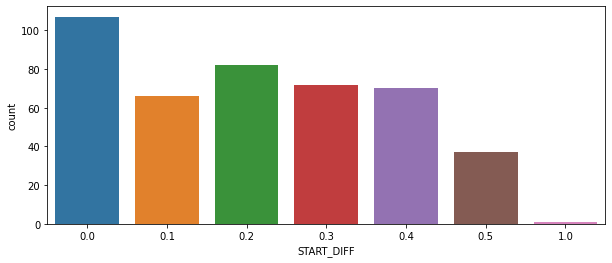

In [23]:
plt.figure(figsize=(10, 4))
sns.countplot(x='START_DIFF', data=fandango_score_df)

Ce film are diferența de 1 punct dintre STARS și RATING?

In [24]:
fandango_score_df[fandango_score_df['START_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,START_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [25]:
all_sites_scores_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [26]:
all_sites_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

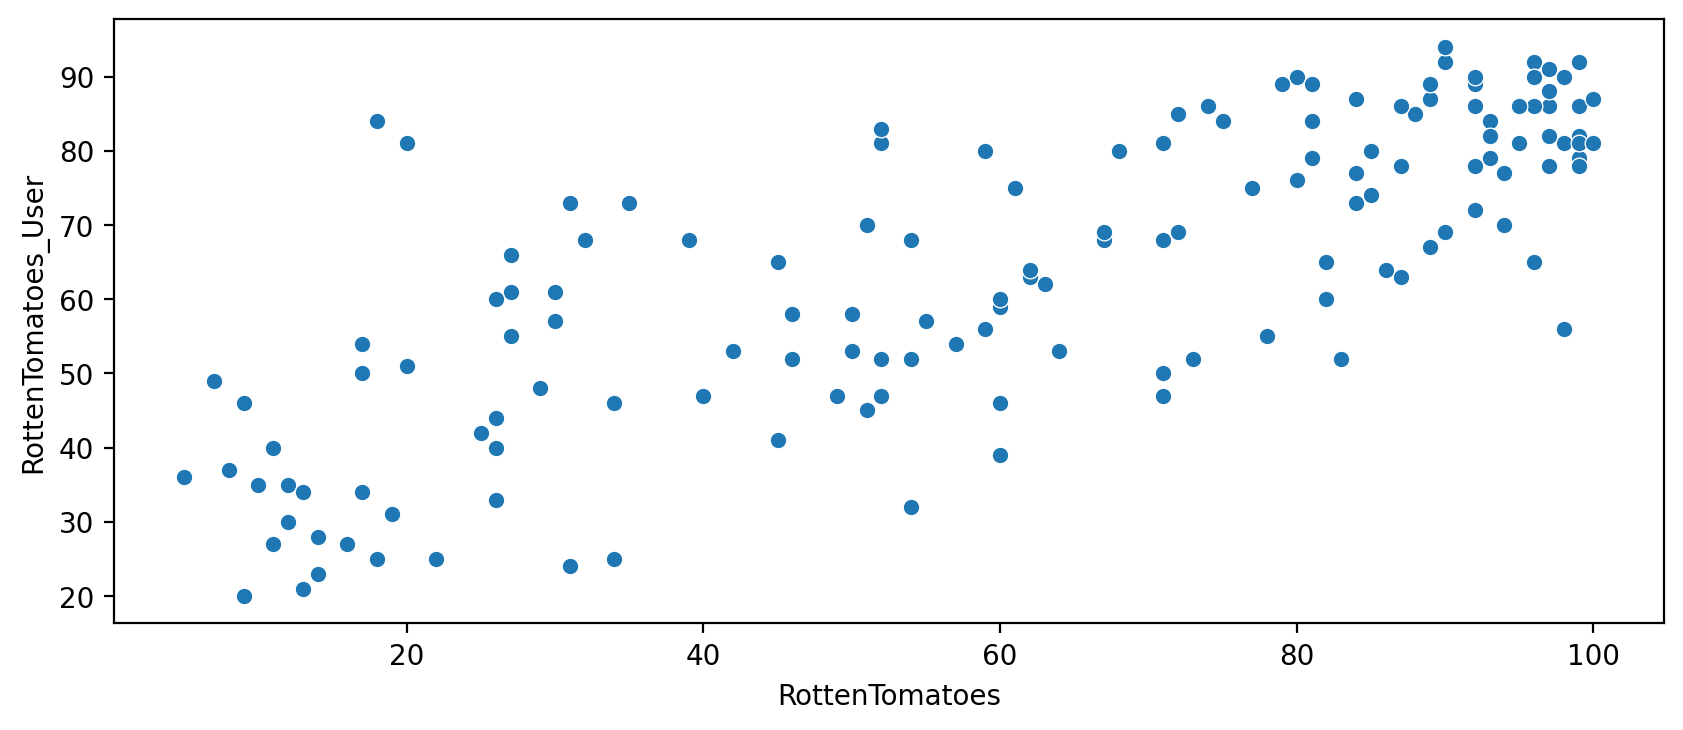

In [27]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(x='RottenTomatoes', y='RottenTomatoes_User', data=all_sites_scores_df)

In [28]:
all_sites_scores_df['RottenTomatoes_difference'] = all_sites_scores_df['RottenTomatoes_User'] - all_sites_scores_df['RottenTomatoes']

In [29]:
all_sites_scores_df

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,-5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,-9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,-15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,-19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,-19


In [30]:
np.abs(all_sites_scores_df['RottenTomatoes_difference']).mean()

15.095890410958905

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

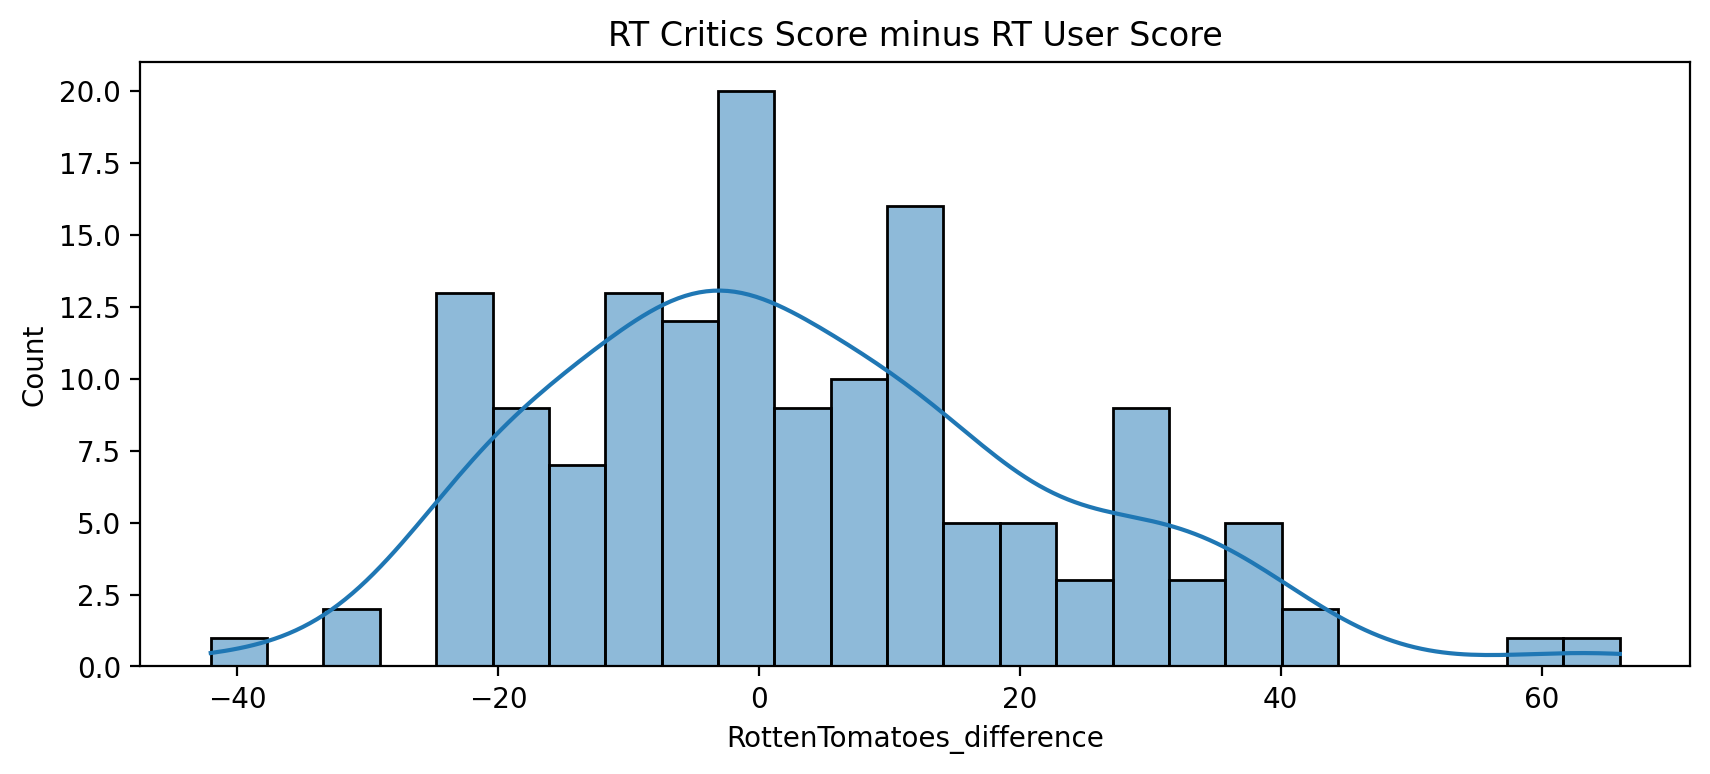

In [37]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites_scores_df,x='RottenTomatoes_difference',kde=True,bins=25)
plt.title("RT Critics Score minus RT User Score")

In [32]:
all_sites_scores_df['RottenTomatoes_difference_abs'] = np.abs(all_sites_scores_df['RottenTomatoes_difference'])

<Figure size 2000x800 with 0 Axes>

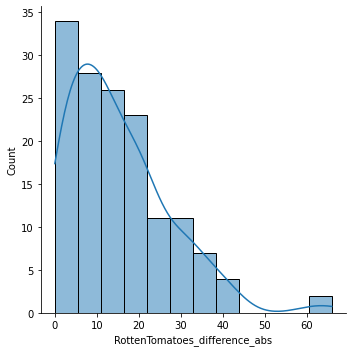

In [38]:
plt.figure(figsize=(10,4),dpi=200)
sns.displot(x='RottenTomatoes_difference_abs', data=all_sites_scores_df, kde=True)

In [40]:
all_sites_scores_df[['FILM', 'RottenTomatoes_difference']].sort_values('RottenTomatoes_difference')

,FILM,RottenTomatoes_difference
69,Mr. Turner (2014),-42
115,While We're Young (2015),-31
112,It Follows (2015),-31
145,"Kumiko, The Treasure Hunter (2015)",-24
40,I'll See You In My Dreams (2015),-24
...,...,...
125,The Wedding Ringer (2015),39
105,Hitman: Agent 47 (2015),42
134,The Longest Ride (2015),42
85,Little Boy (2015),61


In [43]:
all_sites_scores_df[['FILM', 'RottenTomatoes_difference']].sort_values('RottenTomatoes_difference', ascending=False)

,FILM,RottenTomatoes_difference
3,Do You Believe? (2015),66
85,Little Boy (2015),61
134,The Longest Ride (2015),42
105,Hitman: Agent 47 (2015),42
125,The Wedding Ringer (2015),39
...,...,...
40,I'll See You In My Dreams (2015),-24
145,"Kumiko, The Treasure Hunter (2015)",-24
115,While We're Young (2015),-31
112,It Follows (2015),-31


<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

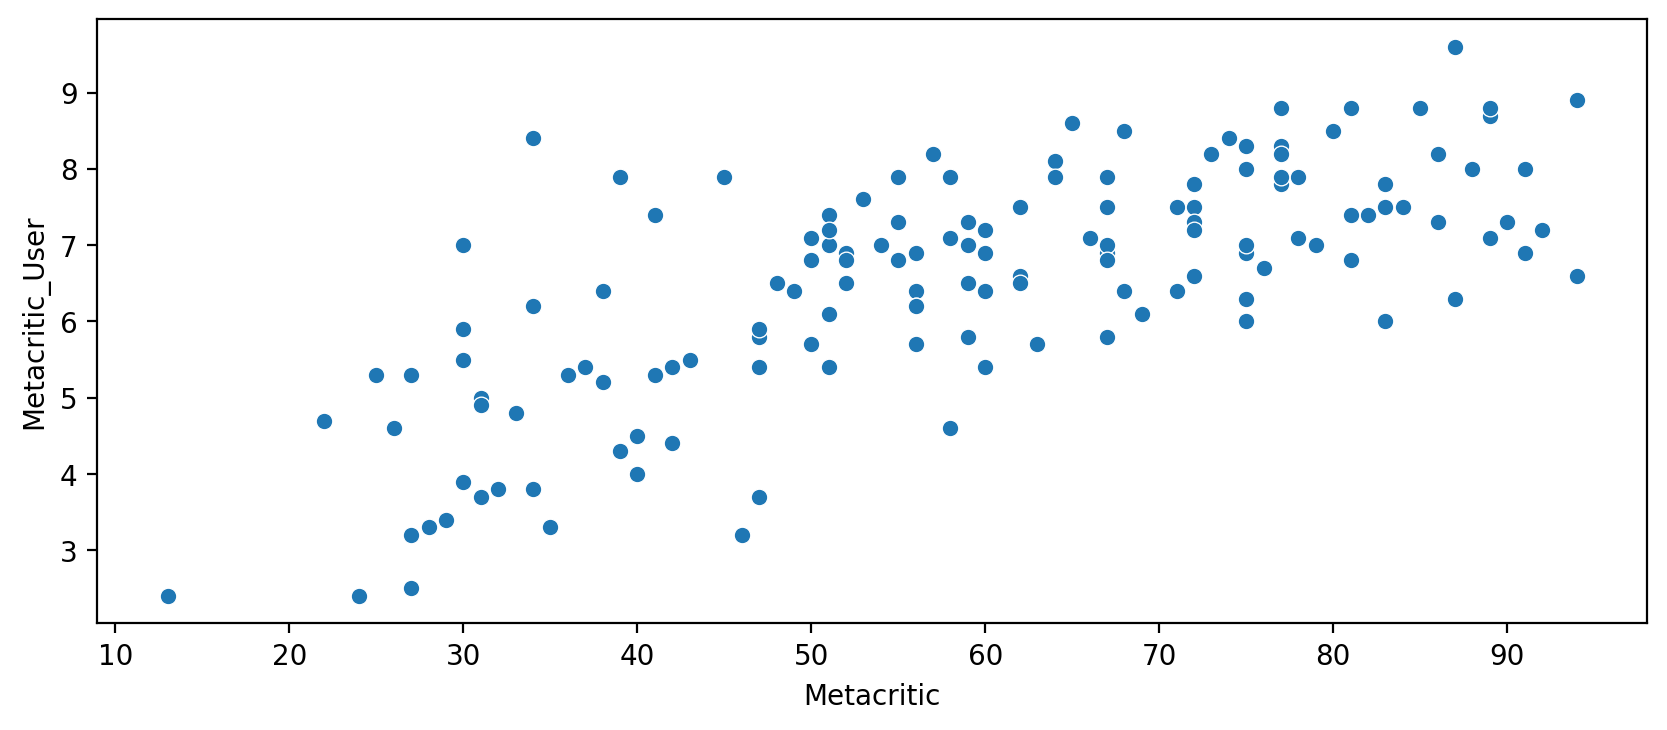

In [51]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(y='Metacritic_User', x='Metacritic', data=all_sites_scores_df)

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

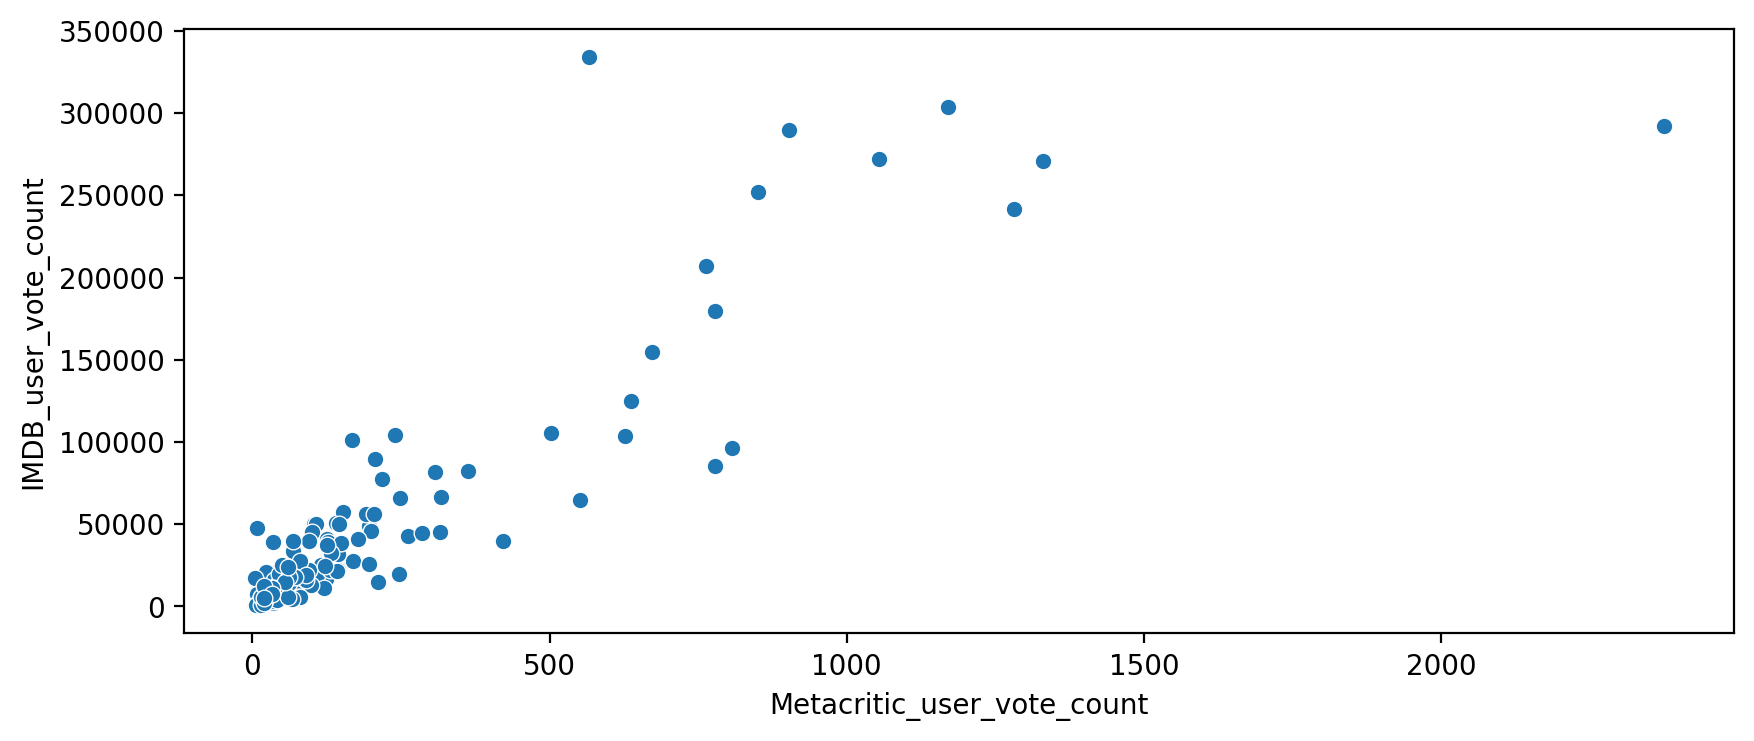

In [49]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(x='Metacritic_user_vote_count', y='IMDB_user_vote_count', data=all_sites_scores_df)

In [53]:
all_sites_scores_df.sort_values('IMDB_user_vote_count', ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_difference,RottenTomatoes_difference_abs
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,2,2


In [55]:
all_sites_scores_df.sort_values('Metacritic_user_vote_count', ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_difference,RottenTomatoes_difference_abs
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,-9,9


In [60]:
all_sites_scores_df.head()
all_sites_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FILM                           146 non-null    object 
 1   RottenTomatoes                 146 non-null    int64  
 2   RottenTomatoes_User            146 non-null    int64  
 3   Metacritic                     146 non-null    int64  
 4   Metacritic_User                146 non-null    float64
 5   IMDB                           146 non-null    float64
 6   Metacritic_user_vote_count     146 non-null    int64  
 7   IMDB_user_vote_count           146 non-null    int64  
 8   RottenTomatoes_difference      146 non-null    int64  
 9   RottenTomatoes_difference_abs  146 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 11.5+ KB


In [61]:
fandango_score_df.head()
fandango_score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FILM        435 non-null    object 
 1   STARS       435 non-null    float64
 2   RATING      435 non-null    float64
 3   VOTES       435 non-null    int64  
 4   YEAR        435 non-null    int64  
 5   START_DIFF  435 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 23.8+ KB


In [58]:
reviews_df = fandango_score_df.merge(all_sites_scores_df, left_on='FILM', right_on='FILM', how='inner')

In [63]:
reviews_df.head()

,FILM,STARS,RATING,VOTES,YEAR,START_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_difference,RottenTomatoes_difference_abs
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,10,10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,3,3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,-8,8


In [64]:
reviews_df['RottenNormalized'] = reviews_df['RottenTomatoes'] / 20

In [67]:
reviews_df['RottenUser_Normalized'] = reviews_df['RottenTomatoes_User'] / 20

In [68]:
reviews_df['MetaNormalized'] = reviews_df['Metacritic'] / 20

In [72]:
reviews_df['MetaUser_Normalized'] = reviews_df['Metacritic_User'] / 2

In [73]:
reviews_df['IMDB_Normalized'] = reviews_df['IMDB'] / 2

In [74]:
reviews_df.head()

,FILM,STARS,RATING,VOTES,YEAR,START_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_difference,RottenTomatoes_difference_abs,RottenNormalized,RottenUser_Normalized,MetaNormalized,MetaUser_Normalized,IMDB_Normalized
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,17,17,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,10,10,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,13,13,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,3,3,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,-8,8,4.90,4.50,4.70,4.45,4.30


In [75]:
raitings = reviews_df[['STARS', 'RATING', 'RottenNormalized', 'RottenUser_Normalized', 'MetaNormalized', 'MetaUser_Normalized', 'IMDB_Normalized']]

In [76]:
raitings.head()

,STARS,RATING,RottenNormalized,RottenUser_Normalized,MetaNormalized,MetaUser_Normalized,IMDB_Normalized
0,4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,4.5,4.5,4.90,4.50,4.70,4.45,4.30


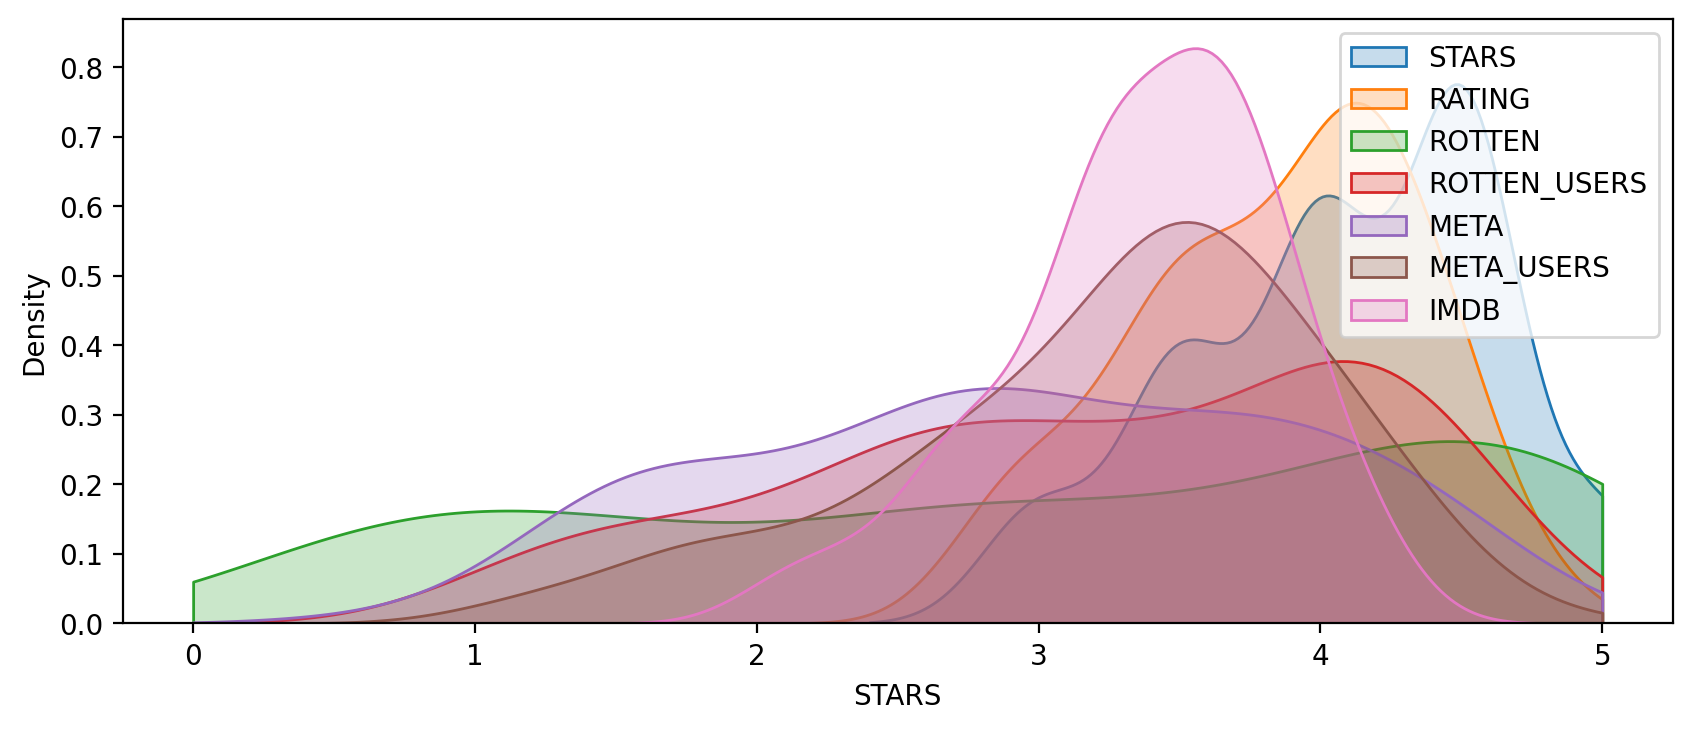

In [80]:
plt.figure(figsize=(10, 4), dpi=200)

sns.kdeplot(x='STARS', data=raitings, fill=True, clip=[0, 5], label='STARS')
sns.kdeplot(x='RATING', data=raitings, fill=True, clip=[0, 5], label='RATING')
sns.kdeplot(x='RottenNormalized', data=raitings, fill=True, clip=[0, 5], label='ROTTEN')
sns.kdeplot(x='RottenUser_Normalized', data=raitings, fill=True, clip=[0, 5], label='ROTTEN_USERS')
sns.kdeplot(x='MetaNormalized', data=raitings, fill=True, clip=[0, 5], label='META')
sns.kdeplot(x='MetaUser_Normalized', data=raitings, fill=True, clip=[0, 5], label='META_USERS')
sns.kdeplot(x='IMDB_Normalized', data=raitings, fill=True, clip=[0, 5], label='IMDB')

plt.legend()

<AxesSubplot:ylabel='Density'>

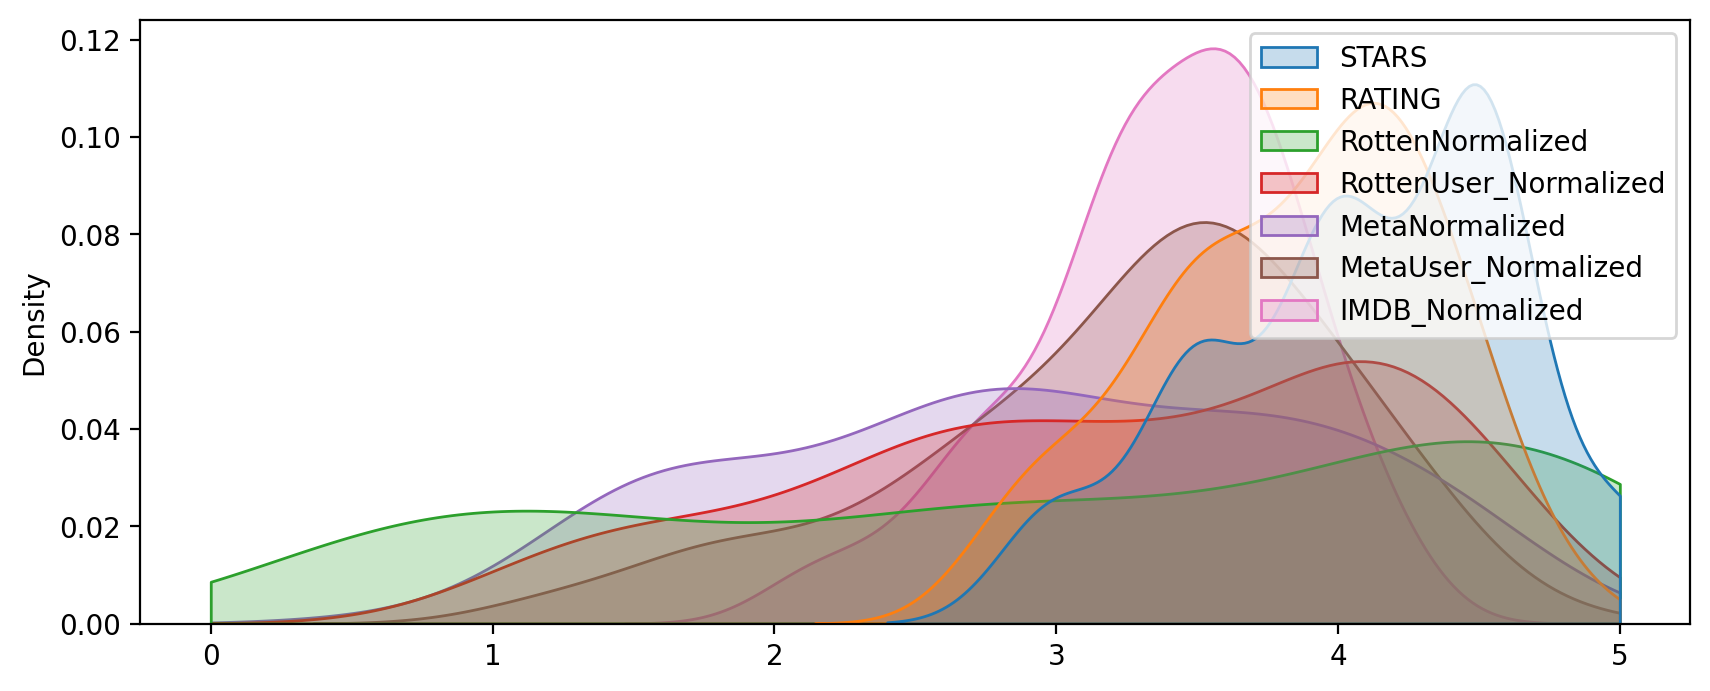

In [84]:
plt.figure(figsize=(10, 4), dpi=200)

sns.kdeplot(data=raitings, fill=True, clip=[0, 5])

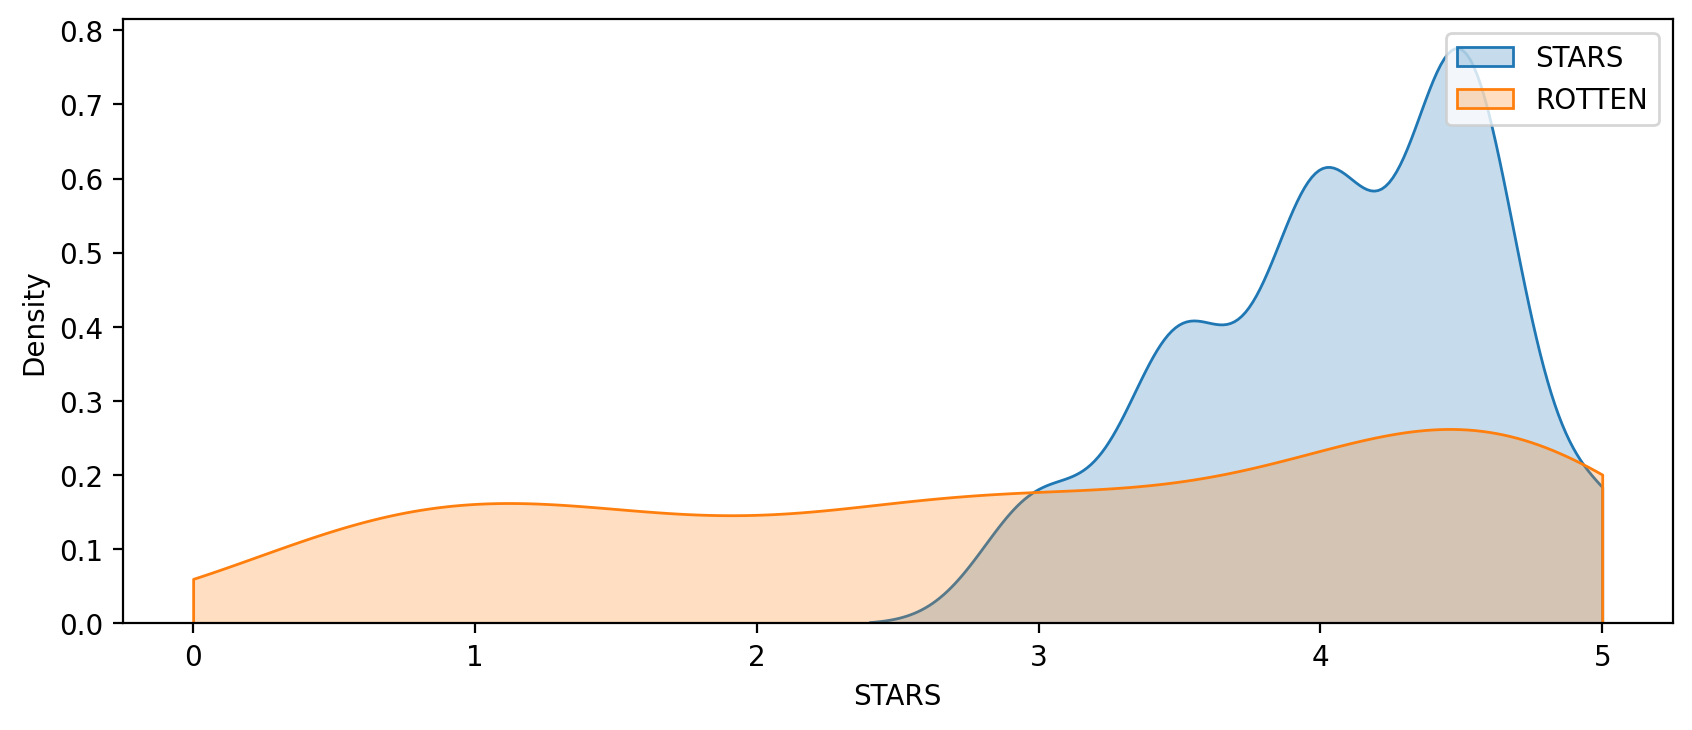

In [85]:
plt.figure(figsize=(10, 4), dpi=200)

sns.kdeplot(x='STARS', data=raitings, fill=True, clip=[0, 5], label='STARS')
sns.kdeplot(x='RottenNormalized', data=raitings, fill=True, clip=[0, 5], label='ROTTEN')

plt.legend()

<AxesSubplot:ylabel='Count'>

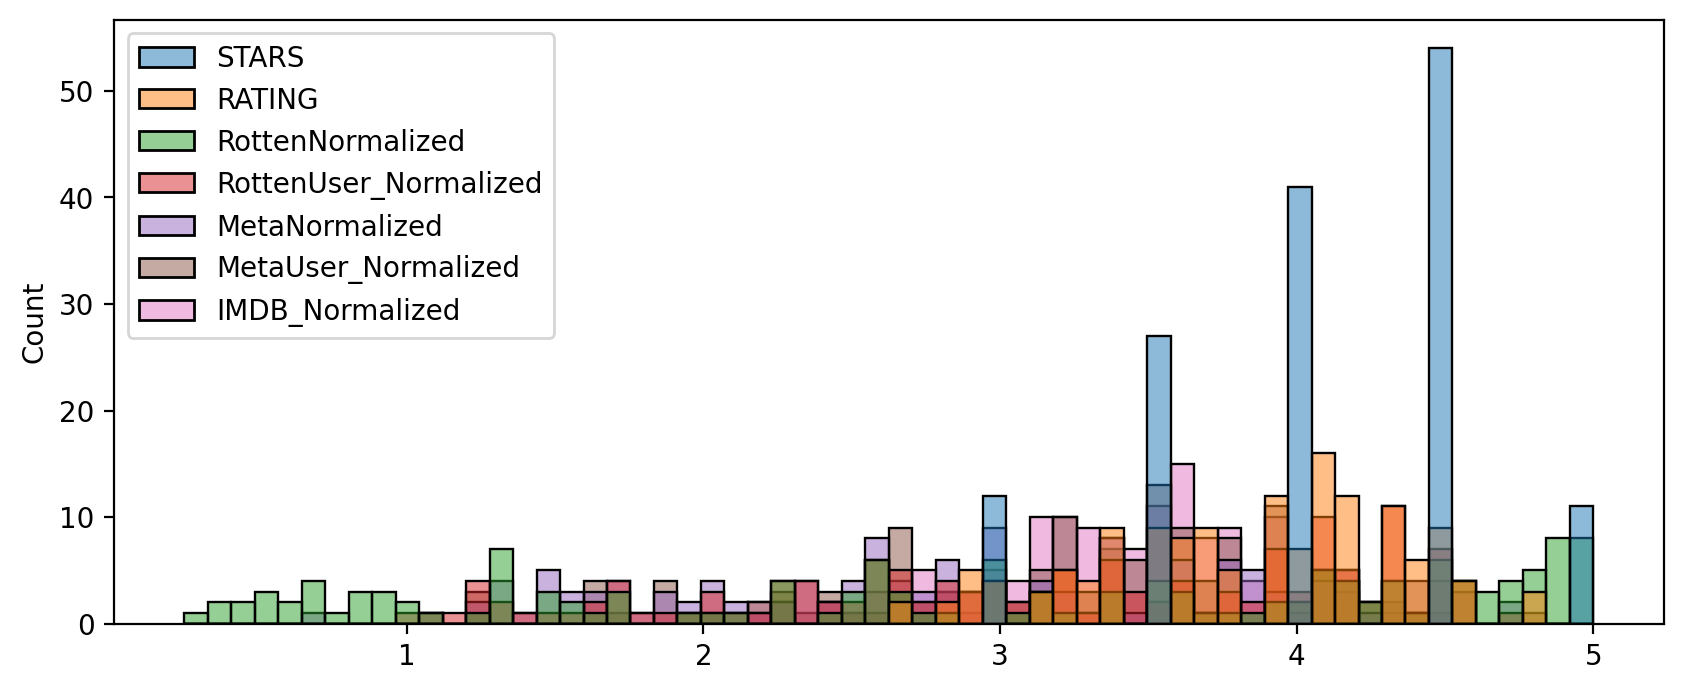

In [89]:
plt.figure(figsize=(10, 4), dpi=200)

sns.histplot(data=raitings, bins=60)

In [91]:
raitings_movies = reviews_df[['STARS', 'RATING', 'RottenNormalized', 'RottenUser_Normalized', 'MetaNormalized', 'MetaUser_Normalized', 'IMDB_Normalized', 'FILM']]

In [92]:
worst_ten = raitings_movies.sort_values('RottenNormalized', ascending=True).head(10)

In [93]:
worst_ten

,STARS,RATING,RottenNormalized,RottenUser_Normalized,MetaNormalized,MetaUser_Normalized,IMDB_Normalized,FILM
49,3.5,3.5,0.25,1.80,0.65,1.20,2.15,Paul Blart: Mall Cop 2 (2015)
84,4.0,3.9,0.35,2.45,1.40,1.65,2.95,Hitman: Agent 47 (2015)
54,4.0,3.7,0.40,1.85,1.55,1.85,2.45,Hot Pursuit (2015)
25,4.5,4.1,0.45,2.30,1.30,2.30,3.05,Taken 3 (2015)
28,3.0,2.7,0.45,1.00,1.35,1.25,2.00,Fantastic Four (2015)
50,4.0,3.6,0.50,1.75,1.50,2.75,2.30,The Boy Next Door (2015)
88,4.0,3.6,0.55,2.00,1.20,1.20,3.15,The Loft (2015)
87,3.5,3.2,0.55,1.35,1.60,1.90,2.70,Unfinished Business (2015)
78,3.5,3.2,0.60,1.50,1.35,1.60,2.75,Mortdecai (2015)
77,3.5,3.2,0.60,1.75,1.50,1.95,2.75,Seventh Son (2015)


<AxesSubplot:ylabel='Density'>

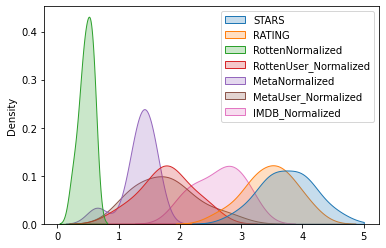

In [94]:
sns.kdeplot(data=worst_ten, fill=True, clip=[0, 5])

In [101]:
worst_ten.iloc[3]

STARS                               4.5
RATING                              4.1
RottenNormalized                   0.45
RottenUser_Normalized               2.3
MetaNormalized                      1.3
MetaUser_Normalized                 2.3
IMDB_Normalized                    3.05
FILM                     Taken 3 (2015)
Name: 25, dtype: object

<AxesSubplot:>

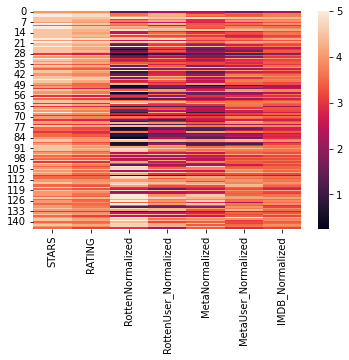

In [103]:
sns.heatmap(data=raitings.drop('FILM', axis=1))